In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

1.10.0


In [3]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [11]:
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [12]:
print("Training set: {}".format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (404, 13)
Testing set: (102, 13)


In [13]:
print(train_data[0])

[3.5233e-01 0.0000e+00 2.1890e+01 0.0000e+00 6.2400e-01 6.4540e+00
 9.8400e+01 1.8498e+00 4.0000e+00 4.3700e+02 2.1200e+01 3.9408e+02
 1.4590e+01]


In [16]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4.0,437.0,21.2,394.08,14.59
1,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77
2,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
3,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
4,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82


In [19]:
print(train_labels[0:10])

[17.1 13.8 50.  19.5 13.4 10.2 18.9 28.5 23.5 30.1]


In [20]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data  =(test_data - mean) / std

print(train_data[0])

[-0.36761011 -0.48361547  1.58544339 -0.25683275  0.56888847  0.26367053
  1.05315307 -0.9323225  -0.62624905  0.18716835  1.23950646  0.41807541
  0.25521602]


In [21]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(train_data.shape[1],)),
        keras.layers.Dense(64, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    
    optimizer = tf.train.RMSPropOptimizer(0.001)
    
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    return model

In [22]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [23]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [25]:
EPOCHS = 500
history = model.fit(
    train_data, train_labels, 
    epochs=EPOCHS, 
    validation_split=0.2, 
    verbose=0, 
    callbacks=[PrintDot()]
)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [40]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Abs Error [1000$]")
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), label='Val Loss')
    plt.legend()
    plt.ylim([0,5])

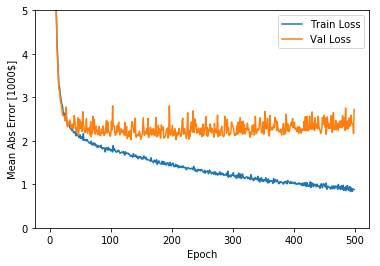

In [41]:
plot_history(history)


....................................................................................................
..........

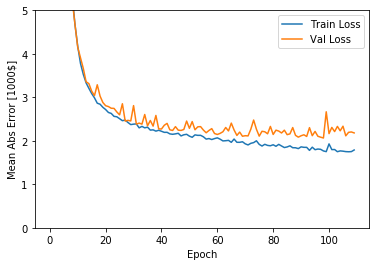

In [43]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                   validation_split=0.2, verbose=0,
                   callbacks=[early_stop, PrintDot()])
plot_history(history)

In [44]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2778.97


In [46]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 8.964812  19.095364  21.154974  30.962864  24.95506   20.825485
 24.346704  20.837238  19.210402  23.792746  16.713175  17.5424
 16.170374  40.94775   20.848415  19.699793  25.944353  19.010944
 20.331024  27.337458  11.331319  16.050434  20.772938  16.783587
 17.872532  25.897089  28.469475  29.174679  11.407098  20.031284
 19.457783  15.238927  32.72444   24.184792  18.72478    8.519969
 16.396801  18.635036  20.354795  24.826595  31.186556  27.00308
 13.846055  42.272953  28.503962  24.756805  26.85941   16.770096
 23.87352   21.92207   34.129436  19.061665  11.51465   16.350613
 34.12672   26.898804  12.7758255 46.511166  33.766407  22.490334
 26.172123  17.430157  15.829155  19.003351  22.848158  20.071505
 13.184615  21.050398  11.169965   7.4969797 27.74353   29.837698
 27.83914   12.284063  24.904757  16.959753  19.416826  23.228447
 34.91628   10.774115  20.639923  35.742485  17.047571  13.247615
 17.290913  17.179302  22.062225  19.348797  22.290594  32.338696
 20.289486  1

In [59]:
print(test_labels)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]
